# **Data Analysis Project - Covid19**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
death_df = pd.read_excel("/content/CovidDeaths.xlsx")

In [ ]:
death_df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511


In [ ]:
death_df.tail()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
85166,ZWE,Africa,Zimbabwe,2021-04-26,38102.0,16.0,34.714,1560.0,3.0,1.000,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
85167,ZWE,Africa,Zimbabwe,2021-04-27,38164.0,62.0,41.286,1565.0,5.0,1.571,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
85168,ZWE,Africa,Zimbabwe,2021-04-28,38191.0,27.0,30.143,1565.0,0.0,1.429,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
85169,ZWE,Africa,Zimbabwe,2021-04-29,38235.0,44.0,31.000,1567.0,2.0,1.714,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
85170,ZWE,Africa,Zimbabwe,2021-04-30,38257.0,22.0,30.286,1567.0,0.0,1.571,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571


In [ ]:
death_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85171 entries, 0 to 85170
Data columns (total 59 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   iso_code                               85171 non-null  object        
 1   continent                              81060 non-null  object        
 2   location                               85171 non-null  object        
 3   date                                   85171 non-null  datetime64[ns]
 4   total_cases                            83072 non-null  float64       
 5   new_cases                              83070 non-null  float64       
 6   new_cases_smoothed                     82069 non-null  float64       
 7   total_deaths                           73408 non-null  float64       
 8   new_deaths                             73566 non-null  float64       
 9   new_deaths_smoothed                    82069 non-null  float6

In [4]:
covid_df = death_df[["location", "date", "total_cases", "new_cases", "total_deaths", "population", "continent"]]

In [ ]:
covid_df.head()

,location,date,total_cases,new_cases,total_deaths,population,continent
0,Afghanistan,2020-02-24,1.0,1.0,NaN,38928341.0,Asia
1,Afghanistan,2020-02-25,1.0,0.0,NaN,38928341.0,Asia
2,Afghanistan,2020-02-26,1.0,0.0,NaN,38928341.0,Asia
3,Afghanistan,2020-02-27,1.0,0.0,NaN,38928341.0,Asia
4,Afghanistan,2020-02-28,1.0,0.0,NaN,38928341.0,Asia


In [5]:
covid_df = covid_df[covid_df['continent'].notnull()]
covid_df.head()

,location,date,total_cases,new_cases,total_deaths,population,continent
0,Afghanistan,2020-02-24,1.0,1.0,NaN,38928341.0,Asia
1,Afghanistan,2020-02-25,1.0,0.0,NaN,38928341.0,Asia
2,Afghanistan,2020-02-26,1.0,0.0,NaN,38928341.0,Asia
3,Afghanistan,2020-02-27,1.0,0.0,NaN,38928341.0,Asia
4,Afghanistan,2020-02-28,1.0,0.0,NaN,38928341.0,Asia


In [ ]:
covid_df.tail()

,location,date,total_cases,new_cases,total_deaths,population,continent
85166,Zimbabwe,2021-04-26,38102.0,16.0,1560.0,14862927.0,Africa
85167,Zimbabwe,2021-04-27,38164.0,62.0,1565.0,14862927.0,Africa
85168,Zimbabwe,2021-04-28,38191.0,27.0,1565.0,14862927.0,Africa
85169,Zimbabwe,2021-04-29,38235.0,44.0,1567.0,14862927.0,Africa
85170,Zimbabwe,2021-04-30,38257.0,22.0,1567.0,14862927.0,Africa


In [6]:
# Replace NaN values with 0
covid_df["total_deaths"] = covid_df["total_deaths"].fillna(0)
covid_df["new_cases"] = covid_df["new_cases"].fillna(0)

## Top 10 locations with most cases

In [ ]:
top10cases = covid_df.groupby(by='location').max()[['total_cases','date']].sort_values(by=['total_cases'],ascending=False).reset_index()

In [ ]:
# Remove 'World' from the column 'location'
top10cases = top10cases[top10cases['location'] != 'World']

In [ ]:
top10cases.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 210 entries, 0 to 209
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   location     210 non-null    object        
 1   total_cases  190 non-null    float64       
 2   date         210 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 6.6+ KB


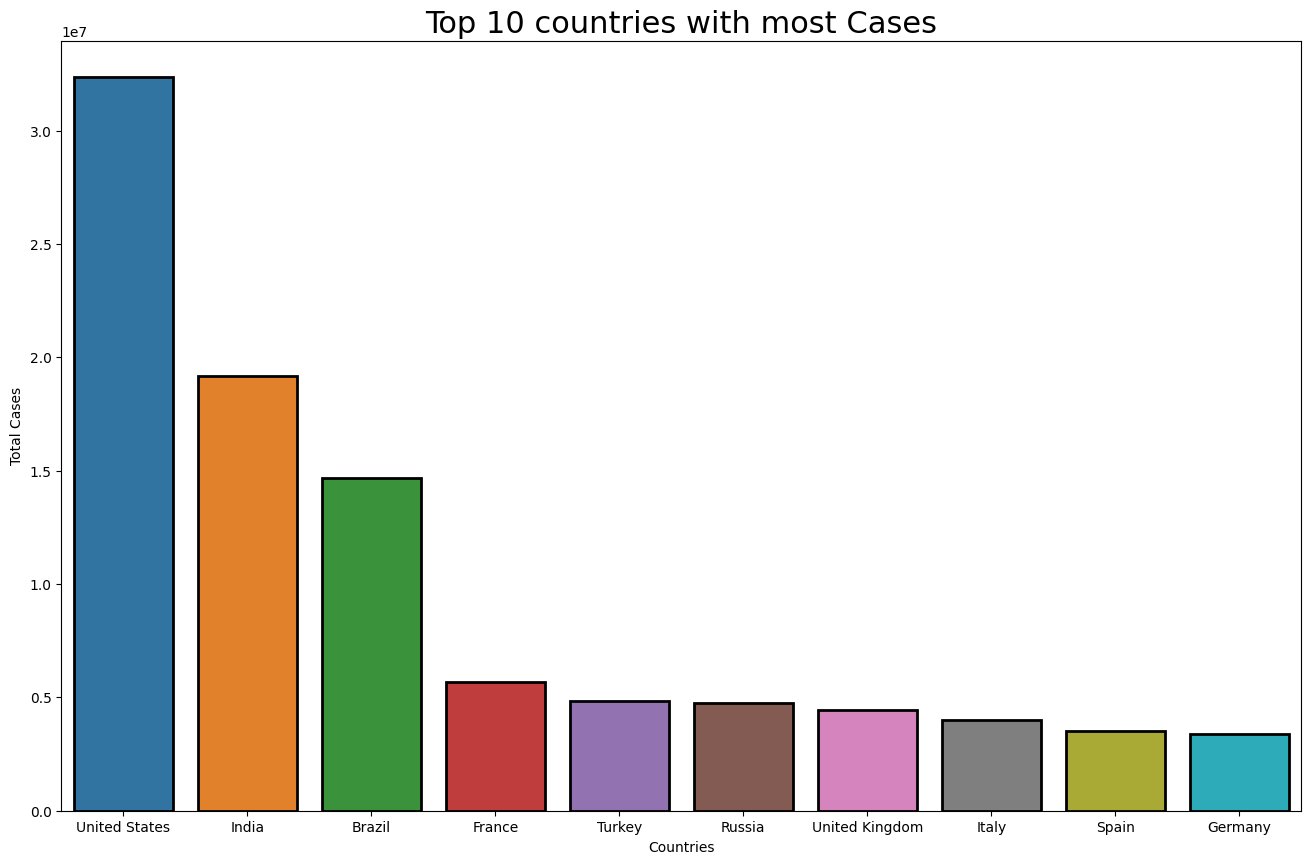

In [ ]:
plt.figure(figsize=(16,10))
plt.title("Top 10 countries with most Cases",size=22)
ax=sns.barplot(data=top10cases.iloc[:10],y='total_cases',x='location',linewidth=2,edgecolor='black')
plt.xlabel("Countries")
plt.ylabel("Total Cases")
plt.show()

### Let's talk in terms of percentage

In [ ]:
# Extract the 'population' column from covid_df and sum it for each country
population_sum = covid_df.groupby('location')['population'].sum().reset_index()

# Merge the population_sum back into the top10cases DataFrame
top10cases = top10cases.merge(population_sum, on='location', how='left')

In [ ]:
top10cases['PercentTotalCases'] = (top10cases['total_cases'] / top10cases['population']) * 100

top10cases = top10cases.sort_values(by=['PercentTotalCases'], ascending=False)


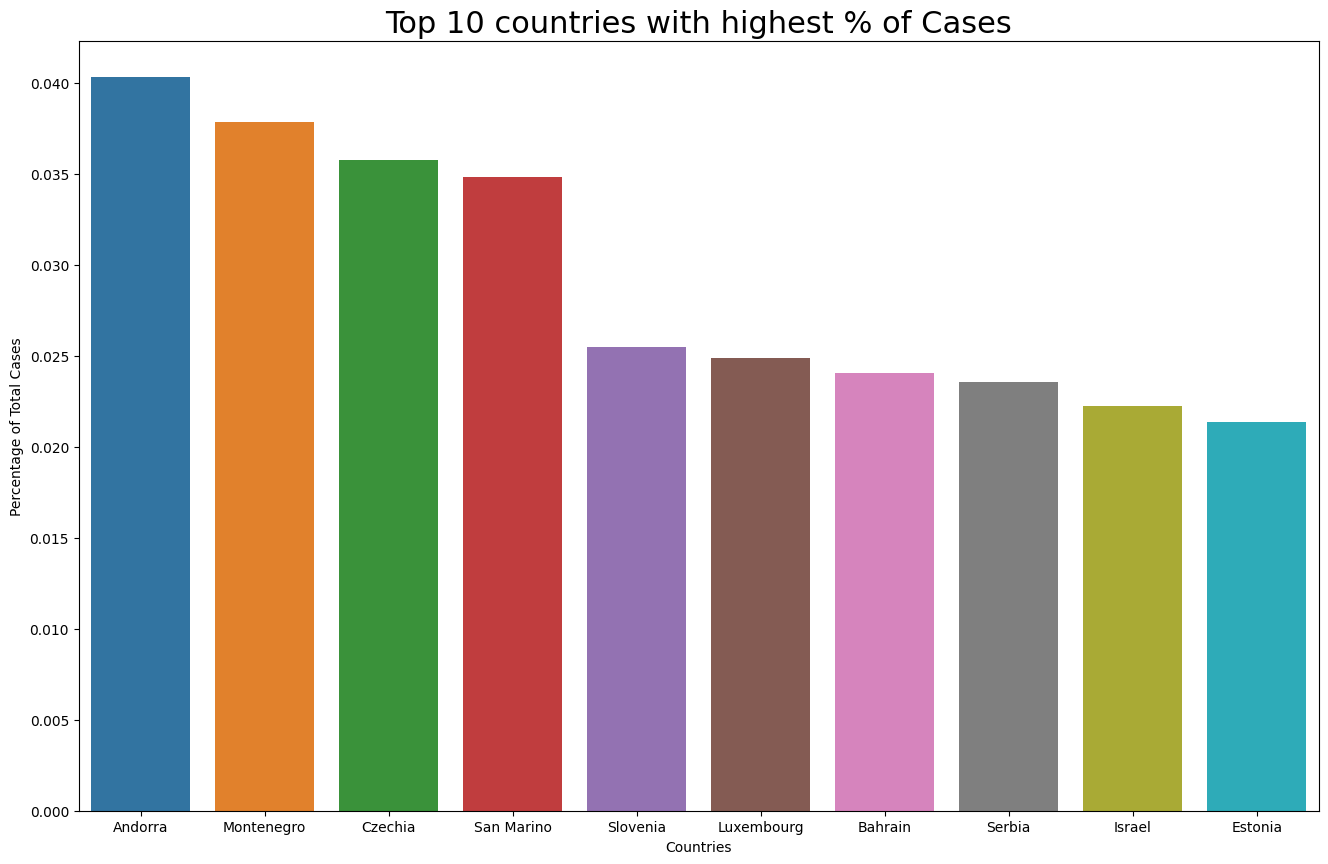

In [ ]:
plt.figure(figsize=(16, 10))
plt.title("Top 10 countries with highest % of Cases", size=22)
ax = sns.barplot(data=top10cases.iloc[:10], x='location', y='PercentTotalCases')
plt.xlabel("Countries")
plt.ylabel("Percentage of Total Cases")
plt.show()

## Top 10 locations with most deaths

In [ ]:
top10Deaths = covid_df.groupby(by='location').max()[['total_deaths','date']].sort_values(by=['total_deaths'],ascending=False).reset_index()

In [ ]:
top10Deaths = top10Deaths[top10Deaths['location'] != 'World']

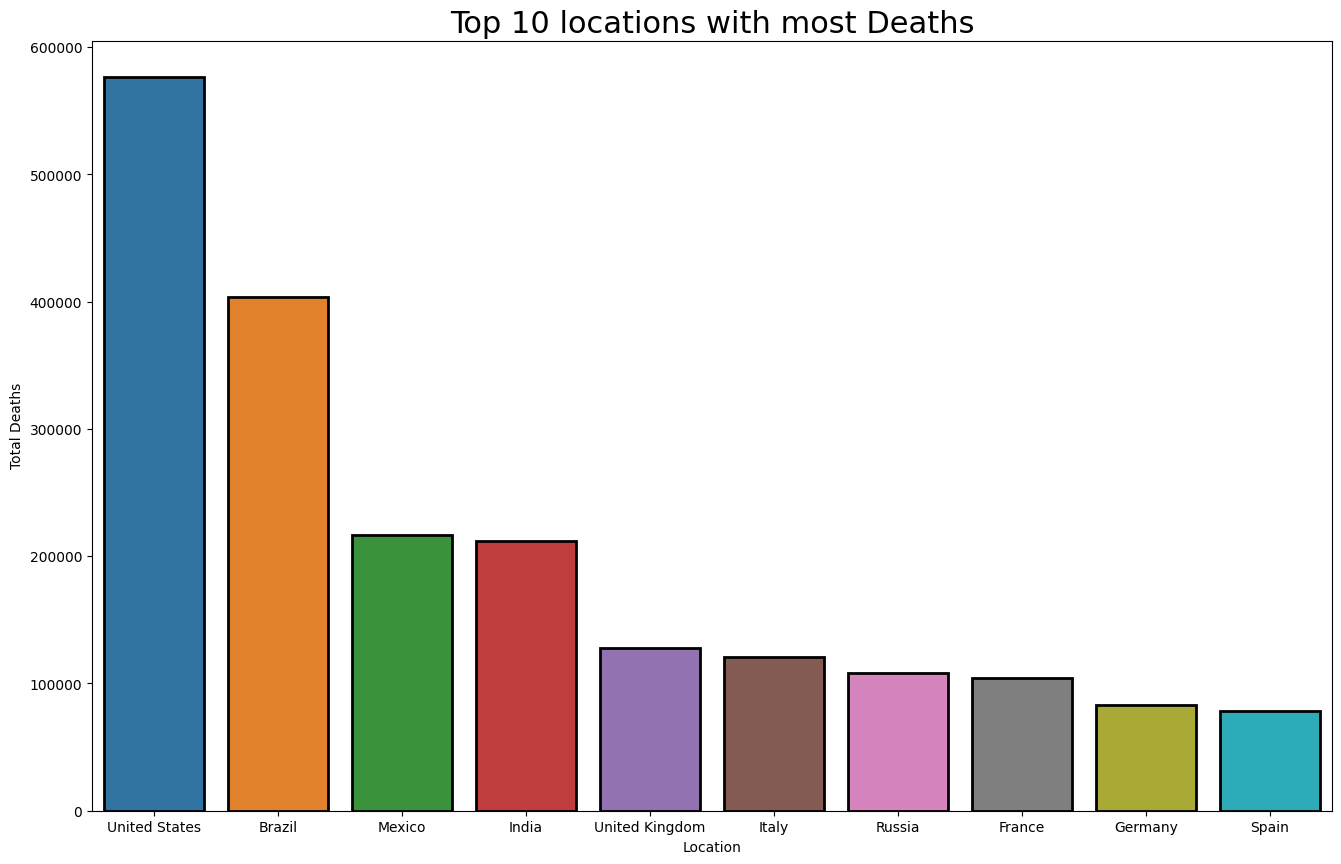

In [ ]:
plt.figure(figsize=(16,10))
plt.title("Top 10 locations with most Deaths",size=22)
ax=sns.barplot(data=top10Deaths.iloc[:10],y='total_deaths',x='location',linewidth=2,edgecolor='black')
plt.xlabel("Location")
plt.ylabel("Total Deaths")
plt.show()

### Let's see the percentage

In [ ]:
top10Deaths = top10Deaths.merge(population_sum, on='location', how='left')

In [ ]:
top10Deaths['PercentTotalDeaths'] = (top10Deaths['total_deaths'] / top10Deaths['population']) * 100

top10Deaths = top10Deaths.sort_values(by=['PercentTotalDeaths'], ascending=False)


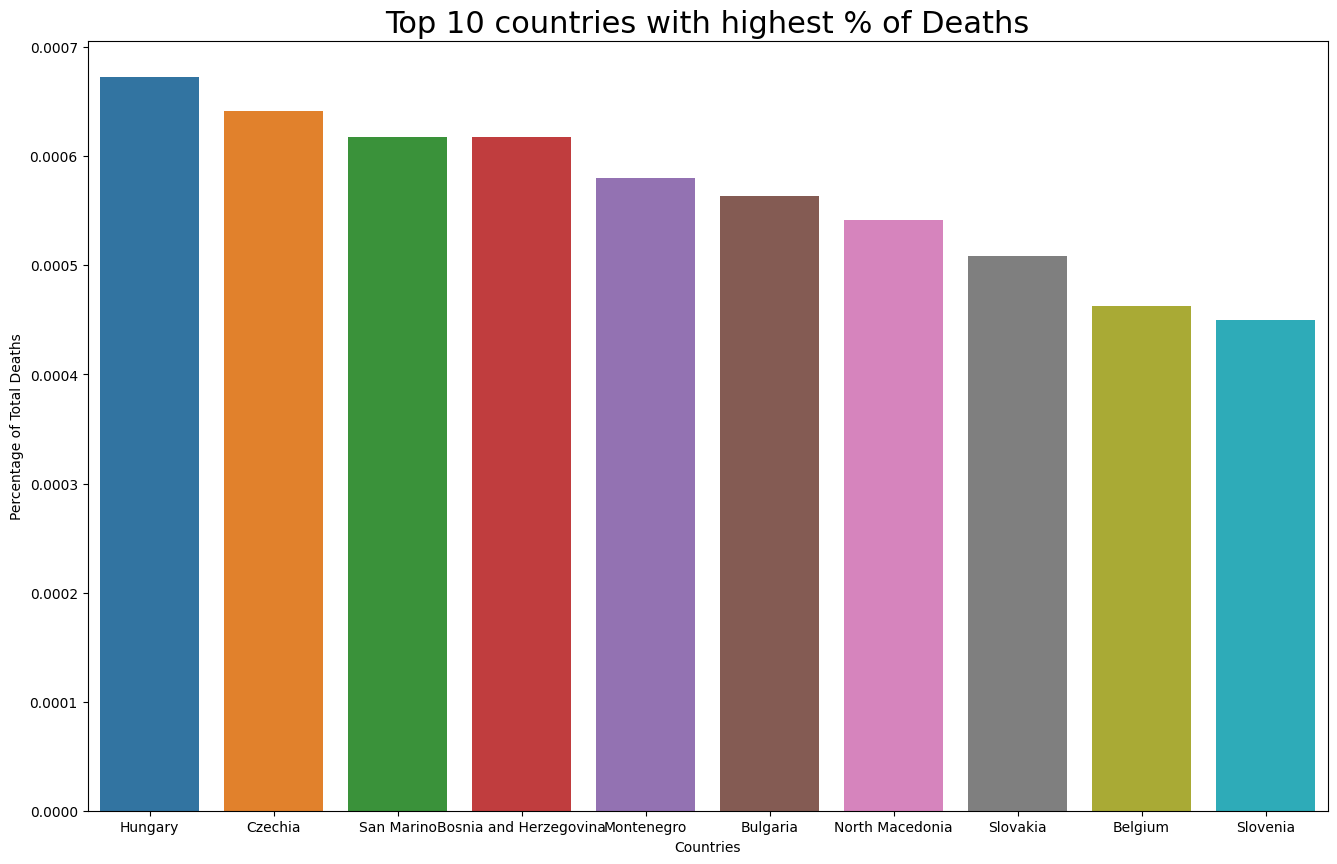

In [ ]:
plt.figure(figsize=(16, 10))
plt.title("Top 10 countries with highest % of Deaths", size=22)
ax = sns.barplot(data=top10Deaths.iloc[:10], x='location', y='PercentTotalDeaths')
plt.xlabel("Countries")
plt.ylabel("Percentage of Total Deaths")
plt.show()

## Let's compare 5 countries

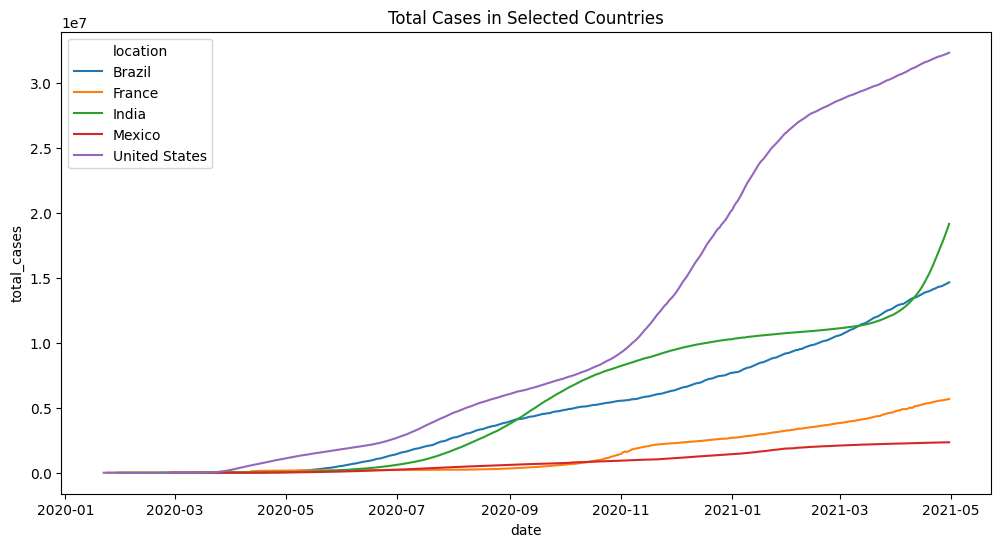

In [8]:
fig=plt.figure(figsize=(12,6))
ax=sns.lineplot(data=covid_df[covid_df['location'].isin(['Brazil','France','United States','Mexico','India'])],x='date',y='total_cases',hue='location')
ax.set_title('Total Cases in Selected Countries');

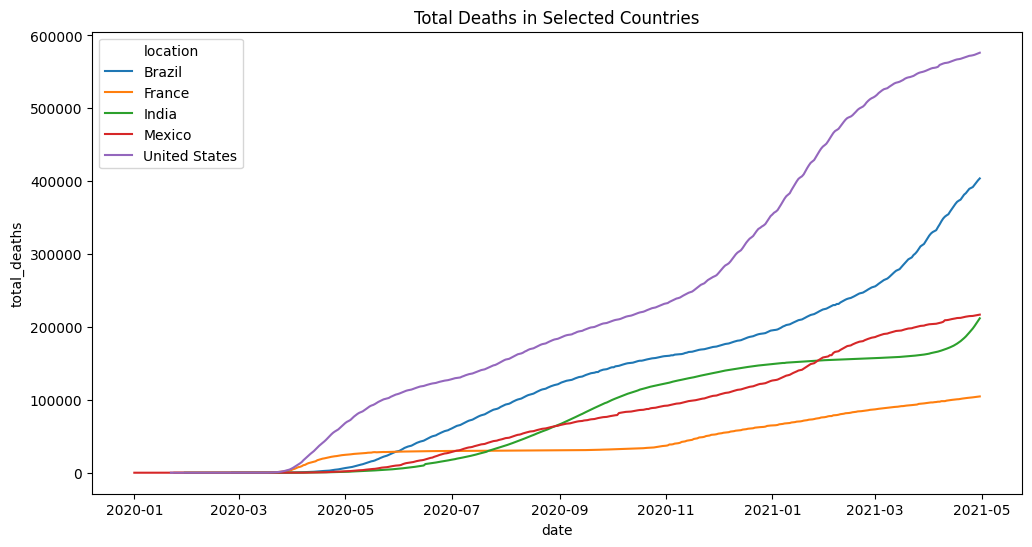

In [9]:
fig=plt.figure(figsize=(12,6))
ax=sns.lineplot(data=covid_df[covid_df['location'].isin(['Brazil','France','United States','Mexico','India'])],x='date',y='total_deaths',hue='location')
ax.set_title('Total Deaths in Selected Countries');

### In Morocco

In [10]:
df = covid_df[covid_df["location"].str.contains("Morocco", case = False)]

In [ ]:
df.head()

,location,date,total_cases,new_cases,total_deaths,population,continent
51817,Morocco,2020-02-07,NaN,0.0,0.0,36910558.0,Africa
51818,Morocco,2020-02-08,NaN,0.0,0.0,36910558.0,Africa
51819,Morocco,2020-02-09,NaN,0.0,0.0,36910558.0,Africa
51820,Morocco,2020-02-10,NaN,0.0,0.0,36910558.0,Africa
51821,Morocco,2020-02-11,NaN,0.0,0.0,36910558.0,Africa


In [11]:
df.isnull().sum()

location         0
date             0
total_cases     24
new_cases        0
total_deaths     0
population       0
continent        0
dtype: int64

In [12]:
df ["DeathPercentage"] = (df["total_deaths"] / df["total_cases"]) * 100

In [13]:
df.tail()

,location,date,total_cases,new_cases,total_deaths,population,continent,DeathPercentage
52261,Morocco,2021-04-26,509465.0,102.0,8999.0,36910558.0,Africa,1.766363
52262,Morocco,2021-04-27,509972.0,507.0,9005.0,36910558.0,Africa,1.765783
52263,Morocco,2021-04-28,510465.0,493.0,9015.0,36910558.0,Africa,1.766037
52264,Morocco,2021-04-29,510886.0,421.0,9020.0,36910558.0,Africa,1.765560
52265,Morocco,2021-04-30,511249.0,363.0,9023.0,36910558.0,Africa,1.764893


In [14]:
df["total_deaths"].corr(df["total_cases"])

0.9991344046892925

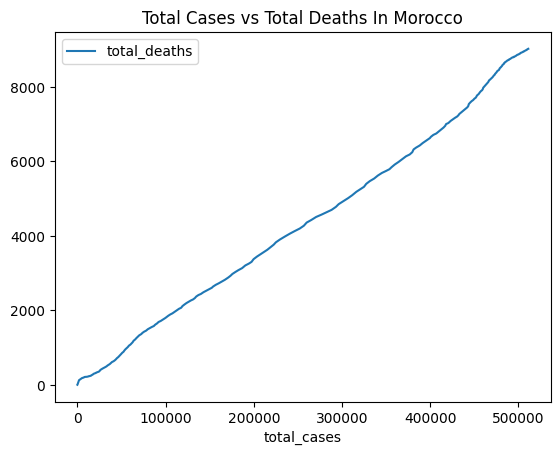

In [16]:
df.plot(x='total_cases', y=['total_deaths'], title='Total Cases vs Total Deaths In Morocco');

In [17]:
all_cases = covid_df["total_cases"].sum()
death_cases = covid_df["total_deaths"].sum()

px.pie(names=["Total Cases","Total Deaths"], values=[all_cases,death_cases],title="Total Cases vs Total Deaths")

## Total Cases vs Population

In [18]:
covid_df["PercentPopulationInfected"] = (covid_df["total_cases"] / covid_df["population"]) * 100

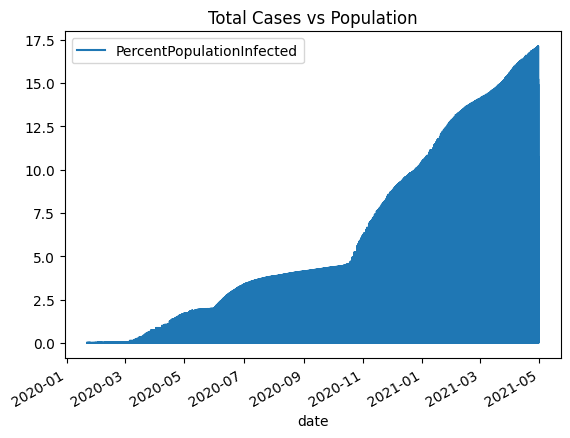

In [19]:
covid_df.plot(x='date', y='PercentPopulationInfected',  title='Total Cases vs Population');

In [ ]:
# Countries with Highest Infection Rate compared to Population
highest_infection_rate = covid_df.groupby(['location', 'population']).agg({'total_cases': 'max'}).reset_index()
highest_infection_rate['PercentPopulationInfected'] = (highest_infection_rate['total_cases'] / highest_infection_rate['population']) * 100
highest_infection_rate = highest_infection_rate.sort_values(by='PercentPopulationInfected', ascending=False)

In [ ]:
highest_infection_rate.head()

,location,population,total_cases,PercentPopulationInfected
3,Andorra,77265.0,13232.0,17.125477
128,Montenegro,628062.0,97389.0,15.506272
49,Czechia,10708982.0,1630758.0,15.227946
162,San Marino,33938.0,5066.0,14.927220
171,Slovenia,2078932.0,240292.0,11.558435


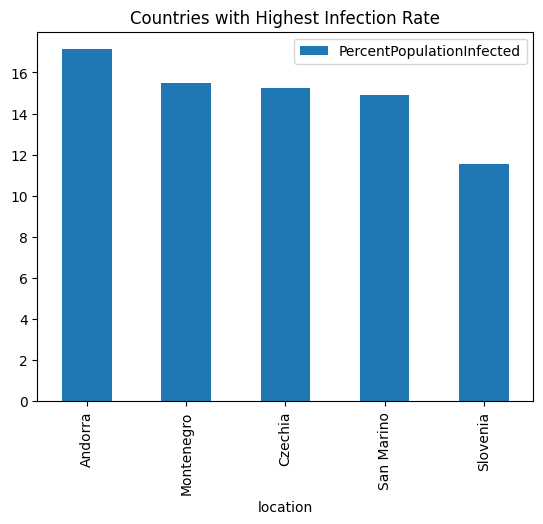

In [ ]:
highest_infection_rate_top5 = highest_infection_rate.head(5)
highest_infection_rate_top5.plot(x='location', y='PercentPopulationInfected', kind='bar', title='Countries with Highest Infection Rate');

## Covid Vaccination

In [ ]:
vaccine_df = pd.read_excel("/content/CovidVaccinations.xlsx")

In [ ]:
vaccine_df.head()

In [ ]:
vaccine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85171 entries, 0 to 85170
Data columns (total 37 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   iso_code                               85171 non-null  object        
 1   continent                              81060 non-null  object        
 2   location                               85171 non-null  object        
 3   date                                   85171 non-null  datetime64[ns]
 4   new_tests                              38945 non-null  float64       
 5   total_tests                            38652 non-null  float64       
 6   total_tests_per_thousand               38652 non-null  float64       
 7   new_tests_per_thousand                 38945 non-null  float64       
 8   new_tests_smoothed                     44625 non-null  float64       
 9   new_tests_smoothed_per_thousand        44625 non-null  float6

In [ ]:
vaccine_df = vaccine_df[["date","location","continent","total_tests","new_vaccinations","total_vaccinations","people_vaccinated","positive_rate"]]

In [ ]:
vaccine_df.tail()

,date,location,continent,total_tests,new_vaccinations,total_vaccinations,people_vaccinated,positive_rate
85166,2021-04-26,Zimbabwe,Africa,484446.0,21592.0,411610.0,353834.0,0.020
85167,2021-04-27,Zimbabwe,Africa,486801.0,22329.0,433939.0,370676.0,0.024
85168,2021-04-28,Zimbabwe,Africa,488826.0,24074.0,458013.0,388021.0,0.018
85169,2021-04-29,Zimbabwe,Africa,NaN,19584.0,477597.0,400771.0,NaN
85170,2021-04-30,Zimbabwe,Africa,NaN,22745.0,500342.0,414735.0,NaN


In [ ]:
# Total Population vs Vaccinations
pop_vs_vac = pd.merge(covid_df, vaccine_df, on=['location', 'date', 'continent'])
pop_vs_vac['RollingPeopleVaccinated'] = pop_vs_vac.groupby('location')['new_vaccinations'].cumsum()
pop_vs_vac['PercentPopulationInfected'] = (pop_vs_vac['RollingPeopleVaccinated'] / pop_vs_vac['population']) * 100

In [ ]:
pop_vs_vac.tail()

,location,date,total_cases,new_cases,total_deaths,population,continent,PercentPopulationInfected,total_tests,new_vaccinations,total_vaccinations,people_vaccinated,positive_rate,RollingPeopleVaccinated
81055,Zimbabwe,2021-04-26,38102.0,16.0,1560.0,14862927.0,Africa,2.760533,484446.0,21592.0,411610.0,353834.0,0.020,410296.0
81056,Zimbabwe,2021-04-27,38164.0,62.0,1565.0,14862927.0,Africa,2.910766,486801.0,22329.0,433939.0,370676.0,0.024,432625.0
81057,Zimbabwe,2021-04-28,38191.0,27.0,1565.0,14862927.0,Africa,3.072739,488826.0,24074.0,458013.0,388021.0,0.018,456699.0
81058,Zimbabwe,2021-04-29,38235.0,44.0,1567.0,14862927.0,Africa,3.204503,NaN,19584.0,477597.0,400771.0,NaN,476283.0
81059,Zimbabwe,2021-04-30,38257.0,22.0,1567.0,14862927.0,Africa,3.357535,NaN,22745.0,500342.0,414735.0,NaN,499028.0


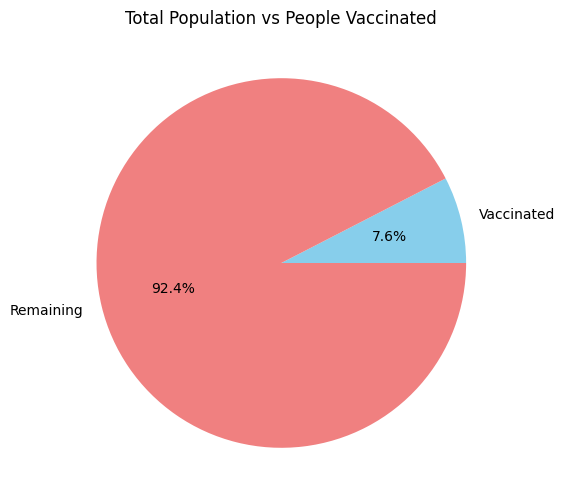

In [ ]:
# Calculate the remaining population (not vaccinated)
pop_vs_vac['RemainingPopulation'] = pop_vs_vac['population'] - pop_vs_vac['RollingPeopleVaccinated']

data = pop_vs_vac.groupby('location').agg('sum')

# Plot the pie chart
plt.figure(figsize=(10, 6))
plt.pie([data['RollingPeopleVaccinated'].sum(), data['RemainingPopulation'].sum()], labels=['Vaccinated', 'Remaining'], autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title('Total Population vs People Vaccinated')
plt.show()

In [ ]:
top10vaccinated = vaccine_df.groupby(by='location').max()[['total_vaccinations','date']].sort_values(by=['total_vaccinations'],ascending=False).reset_index()

In [ ]:
top10vaccinated = top10vaccinated[top10vaccinated['location'] != 'World']

In [ ]:
exclude_continents = ['Asia', 'Africa','Europe','North America','European Union','South America']

top10vaccinated_filtered = top10vaccinated[~top10vaccinated['location'].isin(exclude_continents)]


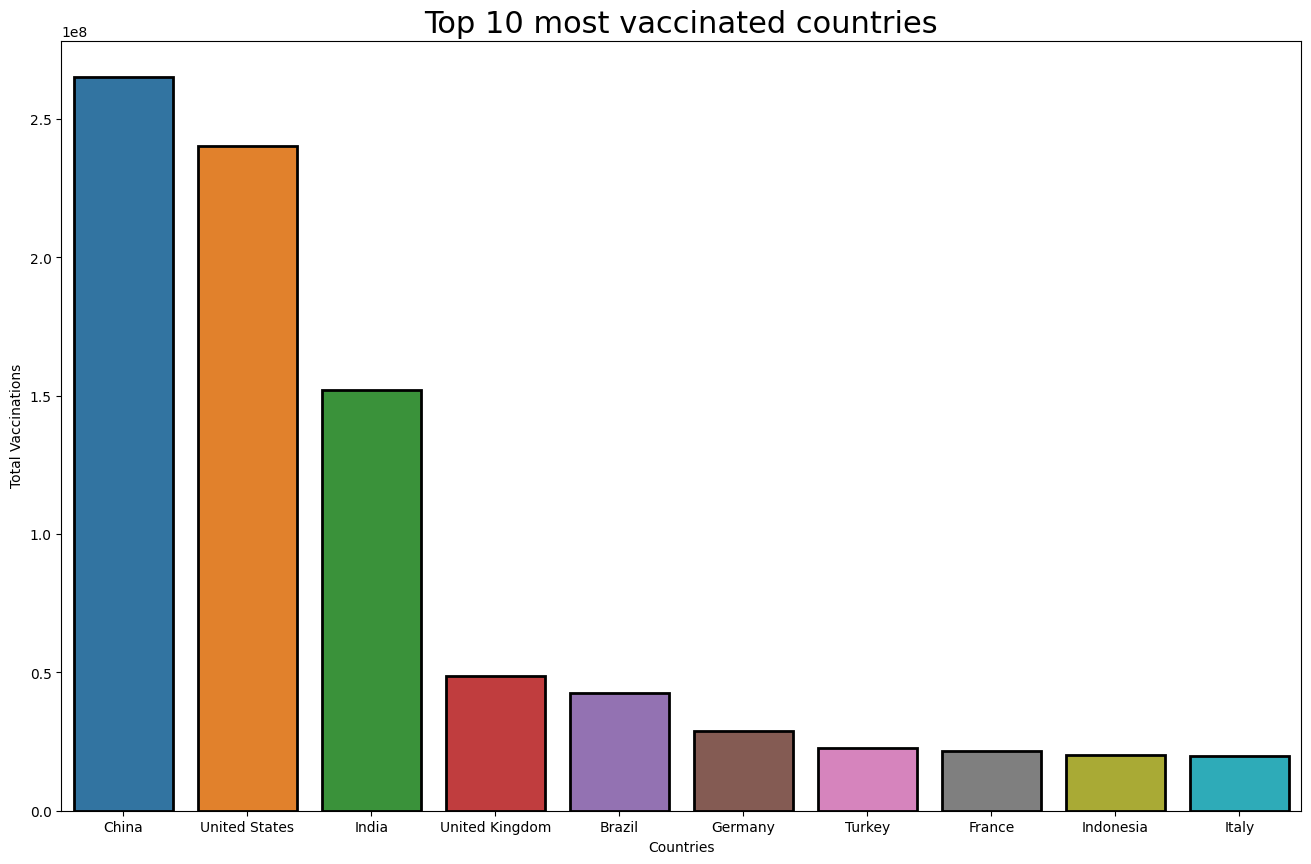

In [ ]:
plt.figure(figsize=(16,10))
plt.title("Top 10 most vaccinated countries",size=22)
ax=sns.barplot(data=top10vaccinated_filtered.iloc[:10],y='total_vaccinations',x='location',linewidth=2,edgecolor='black')
plt.xlabel("Countries")
plt.ylabel("Total Vaccinations")
plt.show()


In [ ]:
top10least_vaccinated = top10vaccinated_filtered.sort_values(by=['total_vaccinations'],ascending=True)

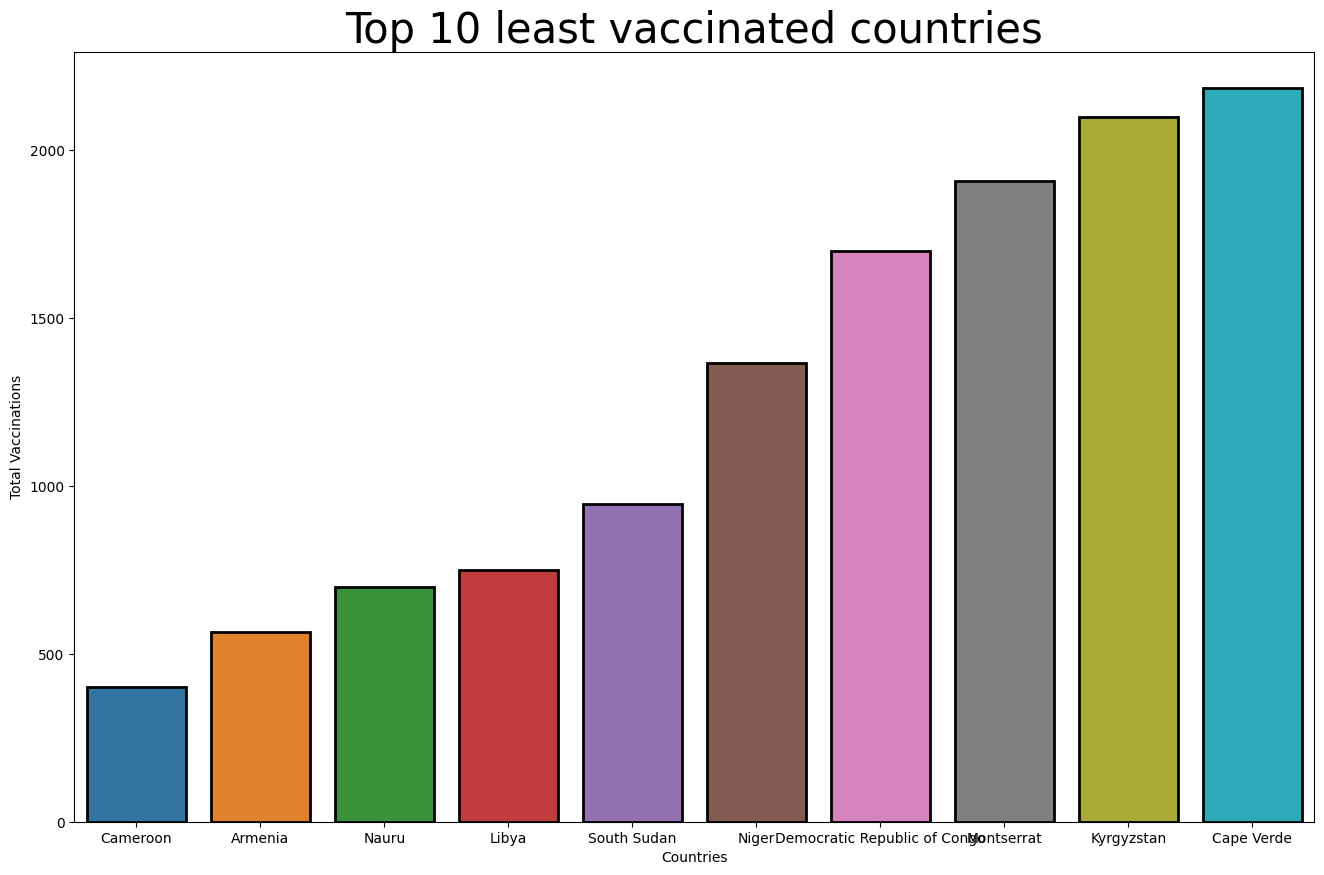

In [ ]:
plt.figure(figsize=(16,10))
plt.title("Top 10 least vaccinated countries",size=30)
ax=sns.barplot(data=top10least_vaccinated.iloc[:10],y='total_vaccinations',x='location',linewidth=2,edgecolor='black')
plt.xlabel("Countries")
plt.ylabel("Total Vaccinations")
plt.show()
